# Creating a netCDF file from a standard DataFrame

In [1]:
from IPython.lib.pretty import pprint
import logging
logger = logging.getLogger('gutils')
logger.handlers = [logging.StreamHandler()]
logger.setLevel(logging.DEBUG)

def plot_profiles(default_df):
    import matplotlib.dates as mpd
    import matplotlib.pyplot as plt
    df = default_df.copy()
    df['z'] = df.z.values * -1
    df['t'] = mpd.date2num(df.t.dt.to_pydatetime())
    df.plot.scatter(x='t', y='z', c='profile', cmap='tab20')
    plt.show()

### Helper for creating standard DataFrame

('Filtered 5/11 profiles from /data/Development/secoora/sgs/GUTILS/gutils/tests/resources/slocum/usf_bass_2016_252_1_12_sbd.dat', 'Depth (1m): 3', 'Points (3): 2', 'Time (10s): 0', 'Distance (1m): 0')


Profiles :  6


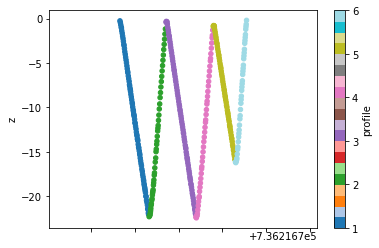

In [2]:
from pathlib import Path

from gutils.slocum import SlocumReader
from gutils.filters import process_dataset

ascii_folder = Path('.').absolute().parent.parent / 'gutils' / 'tests' / 'resources' / 'slocum'
ascii_file = ascii_folder / 'usf_bass_2016_252_1_12_sbd.dat'

# Do it all in one shot
standard, mode = process_dataset(
    file=str(ascii_file),
    reader_class=SlocumReader,
    tsint=2,
    filter_z=1,
    filter_points=3,
    filter_time=10,
    filter_distance=1
)
print('Profiles : ', len(standard.profile.unique()))
plot_profiles(standard)

## Create netCDF from a default template

In [3]:
import tempfile
from gutils.nc import read_attrs, create_netcdf

# output folder
netcdf_output = tempfile.mkdtemp()

In [4]:
# Default "trajectory" metadata
default_attrs = read_attrs()

# The required attributes to identify a unique deployment
default_attrs['glider'] = 'bass'
default_attrs['trajectory_date'] = '20160909T1733'

list(default_attrs['variables'].keys())

['crs',
 'conductivity',
 'density',
 'depth',
 'm_altitude',
 'lat',
 'lat_uv',
 'lon',
 'lon_uv',
 'platform',
 'pressure',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'salinity',
 'temperature',
 'time',
 'time_uv',
 'trajectory',
 'u',
 'v',
 'u_orig',
 'v_orig',
 'sci_oxy3835_oxygen',
 'sci_oxy3835_wphase_oxygen',
 'sci_oxy3835_wphase_saturation',
 'sci_bbfl2s_chlor_scaled',
 'sci_flbbcd_chlor_units',
 'sci_flntu_chlor_units',
 'sci_flntu_turb_units',
 'sci_bbfl2s_cdom_scaled',
 'sci_flbbcd_cdom_units']

In [5]:
# Export the actual netCDF files
netcdf_files = create_netcdf(
    attrs=default_attrs,
    data=standard,
    output_path=netcdf_output,
    mode=mode
)
import netCDF4 as nc4
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Excluded from output (absent from JSON config):
  * m_lon
  * c_wpt_lat
  * m_water_depth
  * m_ballast_pumped
  * m_battpos
  * m_avg_speed
  * m_roll
  * m_depth_rate
  * m_vehicle_temp
  * m_pitch
  * c_heading
  * m_vacuum
  * sci_water_pressure
  * m_mission_avg_speed_diving
  * m_battery
  * m_lat
  * sci_bbfl2s_bb_scaled
  * sci_m_present_time
  * m_gps_lon
  * m_leakdetect_voltage
  * m_heading
  * m_present_time
  * m_mission_avg_speed_climbing
  * drv_m_gps_lon
  * m_gps_lat
  * drv_m_gps_lat
  * m_depth
Created: /tmp/tmpmm2yto_x/bass_20160909T165240Z_1473439960_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170018Z_1473440418_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170513Z_1473440713_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170804Z_1473440884_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T171144Z_1473441104_rt.nc


['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'm_altitude',
 'sci_bbfl2s_cdom_scaled',
 'sci_bbfl2s_chlor_scaled',
 'sci_oxy3835_oxygen',
 'conductivity',
 'temperature',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Create netCDF from an IOOS template

In [6]:
# IOOS NGDAC metadata
ioos_attrs = read_attrs(template='ioos_ngdac')

# The required attributes to identify a unique deployment
ioos_attrs['glider'] = 'bass'
ioos_attrs['trajectory_date'] = '20160909T1733'

list(ioos_attrs['variables'].keys())

['crs',
 'conductivity',
 'density',
 'depth',
 'lat',
 'lat_uv',
 'lon',
 'lon_uv',
 'platform',
 'pressure',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'salinity',
 'temperature',
 'time',
 'time_uv',
 'trajectory',
 'u',
 'v']

In [7]:
# Export the actual netCDF files
netcdf_files = create_netcdf(
    attrs=ioos_attrs,
    data=standard,
    output_path=netcdf_output,
    mode=mode
)
import netCDF4 as nc4
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Excluded from output (absent from JSON config):
  * m_lon
  * sci_bbfl2s_chlor_scaled
  * c_wpt_lat
  * m_water_depth
  * m_ballast_pumped
  * m_battpos
  * m_avg_speed
  * m_roll
  * m_depth_rate
  * m_vehicle_temp
  * m_pitch
  * c_heading
  * m_altitude
  * m_vacuum
  * sci_water_pressure
  * sci_oxy3835_oxygen
  * sci_bbfl2s_cdom_scaled
  * m_mission_avg_speed_diving
  * m_battery
  * m_lat
  * sci_bbfl2s_bb_scaled
  * sci_m_present_time
  * m_leakdetect_voltage
  * m_gps_lon
  * m_heading
  * m_present_time
  * m_mission_avg_speed_climbing
  * drv_m_gps_lon
  * m_gps_lat
  * drv_m_gps_lat
  * m_depth
Created: /tmp/tmpmm2yto_x/bass_20160909T165240Z_1473439960_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170018Z_1473440418_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170513Z_1473440713_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170804Z_1473440884_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T171144Z_1473441104_rt.

['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'conductivity',
 'temperature',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Create netCDF without subsetting any variables

By default only variables that have metadata defined for them are exported


In [8]:
# Export the actual netCDF files, no subset
netcdf_files = create_netcdf(
    attrs=default_attrs,
    data=standard,
    output_path=netcdf_output,
    subset=False,
    mode=mode
)
import netCDF4 as nc4
with nc4.Dataset(netcdf_files[0]) as first_profile:
    pprint(list(first_profile.variables.keys()))

Created: /tmp/tmpmm2yto_x/bass_20160909T165240Z_1473439960_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T165732Z_1473440252_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170018Z_1473440418_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170513Z_1473440713_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T170804Z_1473440884_rt.nc
Created: /tmp/tmpmm2yto_x/bass_20160909T171144Z_1473441104_rt.nc


['trajectory',
 'crs',
 'time',
 'depth',
 'lat',
 'lon',
 'c_heading',
 'c_wpt_lat',
 'm_altitude',
 'm_avg_speed',
 'm_ballast_pumped',
 'm_battery',
 'm_battpos',
 'm_depth',
 'm_depth_rate',
 'm_gps_lat',
 'm_gps_lon',
 'm_heading',
 'm_lat',
 'm_leakdetect_voltage',
 'm_lon',
 'm_mission_avg_speed_climbing',
 'm_mission_avg_speed_diving',
 'm_pitch',
 'm_present_time',
 'm_roll',
 'm_vacuum',
 'm_vehicle_temp',
 'm_water_depth',
 'sci_bbfl2s_bb_scaled',
 'sci_bbfl2s_cdom_scaled',
 'sci_bbfl2s_chlor_scaled',
 'sci_m_present_time',
 'sci_oxy3835_oxygen',
 'conductivity',
 'sci_water_pressure',
 'temperature',
 'drv_m_gps_lat',
 'drv_m_gps_lon',
 'pressure',
 'salinity',
 'density',
 'lat_uv',
 'lon_uv',
 'platform',
 'profile_id',
 'profile_lat',
 'profile_lon',
 'profile_time',
 'time_uv',
 'u',
 'v']


## Produced netCDF files have metadata automatically calculated

In [9]:
with nc4.Dataset(netcdf_files[0]) as first_profile:
    print(first_profile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    featureType: trajectory
    date_created: 2017-11-06T16:52:02Z
    Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    cdm_data_type: trajectory
    format_version: IOOS_Glider_NetCDF_v3.0-noqartod.nc
    keywords: AUVS > Autonomous Underwater Vehicles, Oceans > Ocean Pressure > Water Pressure, Oceans > Ocean Temperature > Water Temperature, Oceans > Salinity/Density > Conductivity, Oceans > Salinity/Density > Density, Oceans > Salinity/Density > Salinity
    keywords_vocabulary: GCMD Science Keywords
    license: This data may be redistributed and used without restriction.  Data provided as is with no expressed or implied assurance of quality assurance or quality control
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    platform_type: Slocum Glider
    processing_level: Dataset taken from glider native file format and is provided as is with no expressed or implied assurance

## Built-in compliance checker

In [10]:
from types import SimpleNamespace
from gutils.nc import check_dataset

In [11]:
# Good file will return 0
first = SimpleNamespace(file=netcdf_files[0])
check_dataset(first)

0

In [12]:
# Bad file will return 1 and log the errors
bad = SimpleNamespace(file=str(ascii_folder.parent / 'should_fail.nc'))
check_dataset(bad)

gliderdac.check_primary_variable_attributes: 'pressure'
  File "/home/kwilcox/miniconda3-py36/envs/gutils35/lib/python3.5/site-packages/cc_plugin_glider/glider_dac.py", line 336, in check_primary_variable_attributes
    test = hasattr(dataset.variables[var], attribute)



1